In [113]:
#import the env
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [114]:
#read the data plus dataframe info
vietDF = pd.read_csv('VietnamConflict.csv')
vietDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58220 entries, 0 to 58219
Data columns (total 31 columns):
SERVICE_TYPE               58038 non-null object
SERVICE_CODE               58220 non-null object
ENROLLMENT                 58217 non-null object
BRANCH                     58220 non-null object
RANK                       58220 non-null object
PAY_GRADE                  58220 non-null object
POSITION                   54013 non-null object
BIRTH_YEAR                 58220 non-null int64
SEX                        58220 non-null object
HOME_CITY                  58098 non-null object
HOME_COUNTY                58191 non-null object
NATIONALITY                58220 non-null object
STATE_CODE                 58103 non-null object
HOME_STATE                 58103 non-null object
MARITAL_STATUS             58220 non-null object
RELIGION                   58217 non-null object
RELIGION_CODE              58217 non-null object
ETHNICITY                  58220 non-null object
ETHNICITY_

In [115]:
#simple head
vietDF.head()

,SERVICE_TYPE,SERVICE_CODE,ENROLLMENT,BRANCH,RANK,PAY_GRADE,POSITION,BIRTH_YEAR,SEX,HOME_CITY,...,DEPLOYMENT_ZONE,DEPLOYMENT_COUNTRY_CODE,DEPLOYMENT_COUNTRY,DIVISION,FATALITY_YEAR,FATALITY_DATE,HOSTILITY_CONDITIONS,FATALITY,FATALITY_2,BURIAL_STATUS
0,Y,S,SELECTED SERVICE,ARMY,SP4,E04,INFANTRYMAN,19450329,M,SISSETON,...,M2,VS,SOUTH VIETNAM,D CO 3 BN 12 INF 4 INF DIV,1968,19680501,H,KILLED IN ACTION,SMALL ARMS FIRE,Y
1,Y,S,SELECTED SERVICE,ARMY,SGT,E05,INFANTRYMAN,19450511,M,HOUSTON,...,M3,VS,SOUTH VIETNAM,1 CAV DIV AIRMOBILE,1970,19700301,H,KILLED IN ACTION,ARTILLERY/MORTAR/ROCKET,Y
2,R,K,ACTIVE - REGULAR,AIR FORCE,A1C,E03,NaN,19510823,M,MOORHEAD,...,M2,VS,SOUTH VIETNAM,NaN,1970,19700801,NH,ACCIDENT,OTHER ACCIDENT,Y
3,Y,S,SELECTED SERVICE,MARINE CORPS,LCPL,E03,RIFLEMAN,19440608,M,KENT,...,M1,VS,SOUTH VIETNAM,NaN,1966,19661201,H,DIED OF WOUNDS,EXPLOSIVE DEVICE,Y
4,Y,S,SELECTED SERVICE,ARMY,SP4,E04,INFANTRYMAN,19481212,M,FORGE VILLAGE,...,M2,VS,SOUTH VIETNAM,1 FIELD FORCE,1970,19700501,H,KILLED IN ACTION,GRENADE,Y


In [116]:
#drop fatality_date for not be consider on the displot
vietDF.drop('FATALITY_DATE',axis=1,inplace=True)

In [117]:
#reduce the birth only to year of birth
vietDF['BIRTH_YEAR'] = vietDF['BIRTH_YEAR'].apply(lambda x : int(str(x)[:4]))

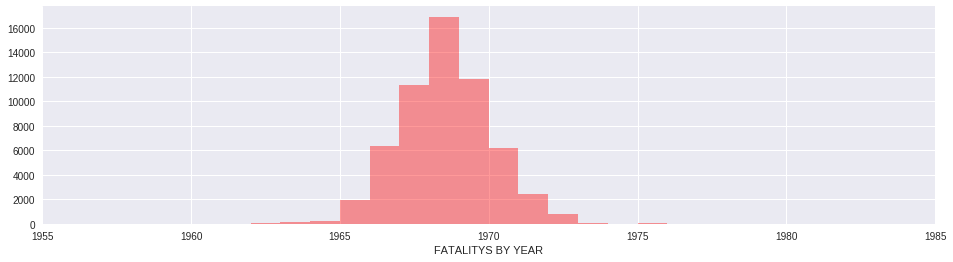

In [148]:
dp = sns.distplot(vietDF['FATALITY_YEAR'], kde=False,color='red', axlabel='FATALITYS BY YEAR', bins=50)
axes = dp.axes
axes.set_xlim(1955,1985)
dp.figure.set_figwidth(16)

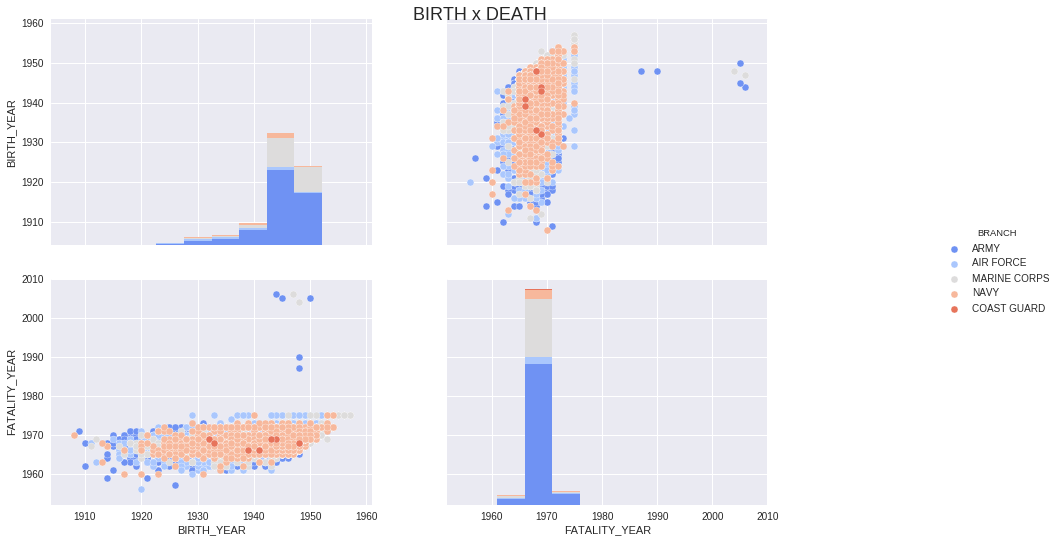

In [119]:
_ = sns.pairplot(vietDF,hue='BRANCH',palette='coolwarm')
_.fig.set_figwidth(16)
_.fig.set_figheight(8)
_.fig.suptitle('BIRTH x DEATH',size=18)

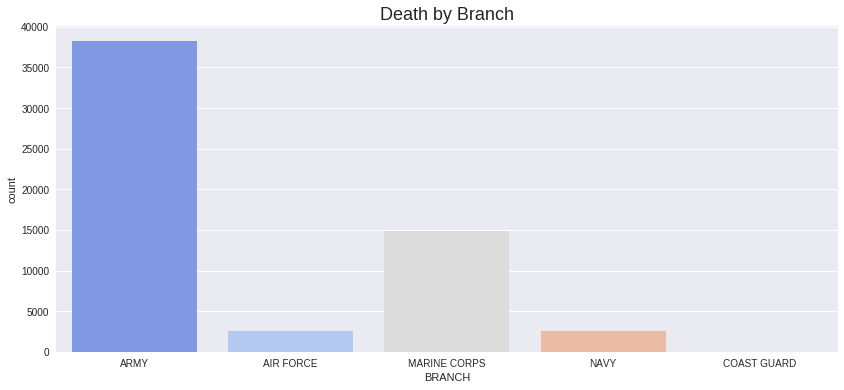

In [120]:
pal = sns.light_palette("purple",reverse=True)
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Death by Branch',size=18)
sns.countplot(x='BRANCH', data=vietDF, palette='coolwarm')

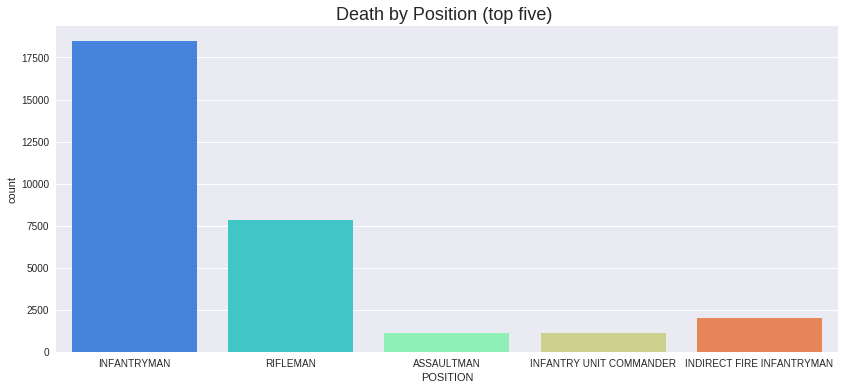

In [121]:
#Select only rows with the five large quantities of positions
five = vietDF['POSITION'][vietDF['POSITION'].notnull()].value_counts()[:5]
count = vietDF[vietDF['POSITION'].apply(lambda x : x in list(five.index))]

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Death by Position (top five) ',size=18)
sns.countplot(x='POSITION',data=count,palette='rainbow')

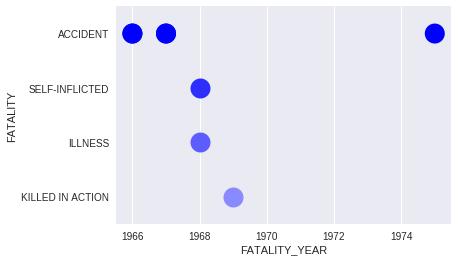

In [122]:
#honorable mention for the 8 women deaths
women = vietDF[vietDF['SEX'] == 'F']
sns.stripplot(x='FATALITY_YEAR', y='FATALITY', data=women,size=20, 
              palette=sns.light_palette(color='blue', reverse=True))

In [124]:
#Create age feature by death - birth
vietDF['AGENT_AGE'] = vietDF['FATALITY_YEAR'] - vietDF['BIRTH_YEAR']

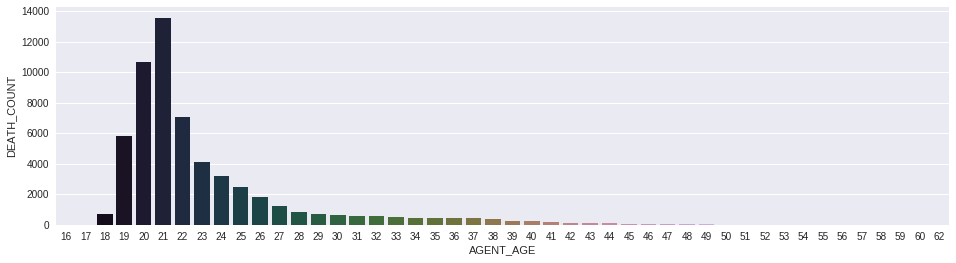

In [145]:
#Deaths by ages
count_age = vietDF.groupby('AGENT_AGE')['SEX'].count()
_ = sns.barplot(x=count_age.index, y=count_age,palette='cubehelix')
_.figure.set_figwidth(16)
_.set_ylabel('DEATH_COUNT')

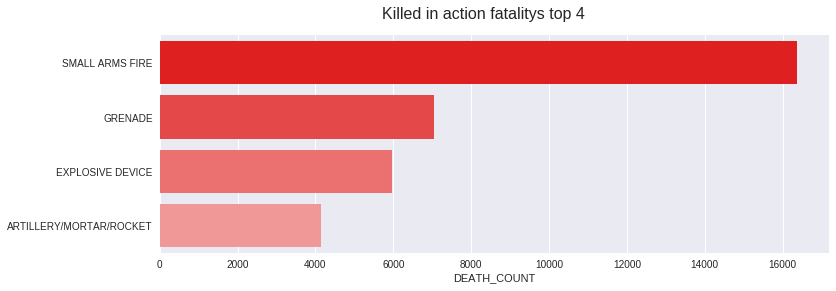

In [186]:
kia_t4 = vietDF['FATALITY_2'][vietDF['FATALITY'] == 'KILLED IN ACTION'].value_counts()[:4]
_ = sns.barplot(x=kia_t4, y=kia_t4.index,palette=sns.light_palette('red',reverse=True))
_.figure.set_figwidth(12)
_.figure.suptitle('Killed in action fatalitys top 4', size=16)
_.set_xlabel('DEATH_COUNT')